### Pregunta 6
Una empresa de telecomunicaciones acaba de incursionar en una nueva ciudad y está dimensionando y planificando el despliegue de un sistema para interconectar sus servidores prime. 

La interconexión debe unir los servidores prime que se encuentran en los centros de datos de sus cinco sedes (norte, sur, centro, este y oeste), así como también interconectar a sus tres centros de atención al cliente. 

El área de Planificación y Optimización debe seleccionar un conjunto de líneas de fibra óptica que conecte todos los servidores prime de sus 5 sedes y de sus 3 centros de atención al cliente, a un mínimo costo posible por línea. 

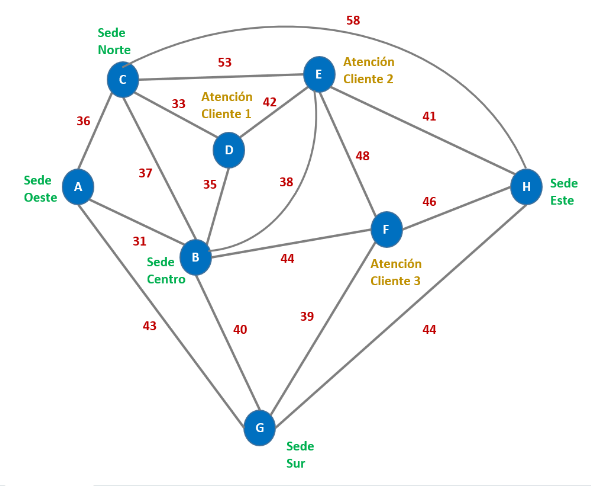  

Se solicita:

(1pto) Hallar de forma manual, si existe, el conjunto de líneas de fibra óptica.  
(1ptos) Hallar de forma manual el costo total del conjunto de líneas elegido, adjuntando el procedimiento seguido de forma manual en un archivo tipo .jpg  
(4ptos) Indicar el algoritmo o técnica utilizado para resolver el requerimiento, implementando y adjuntando el código en Python que considere:  
. Ingresar y mostrar el grafo del enunciado.  
. Señalar cada una de las lineas de fibra óptica encontradas así como sus costos por cada linea (camino) de fibra óptica.  
. Mostrar el grafo resultante con las lineas de fibra óptica encontradas así como sus costos por cada linea (camino) de fibra óptica.

### **Solución**  
Hallamos de manera manual  
1. Sí existe el conjunto de lineas de fibra óptica  
2. El costo total es de 257  
![kruskal manual.png](<attachment:kruskal manual.png>)
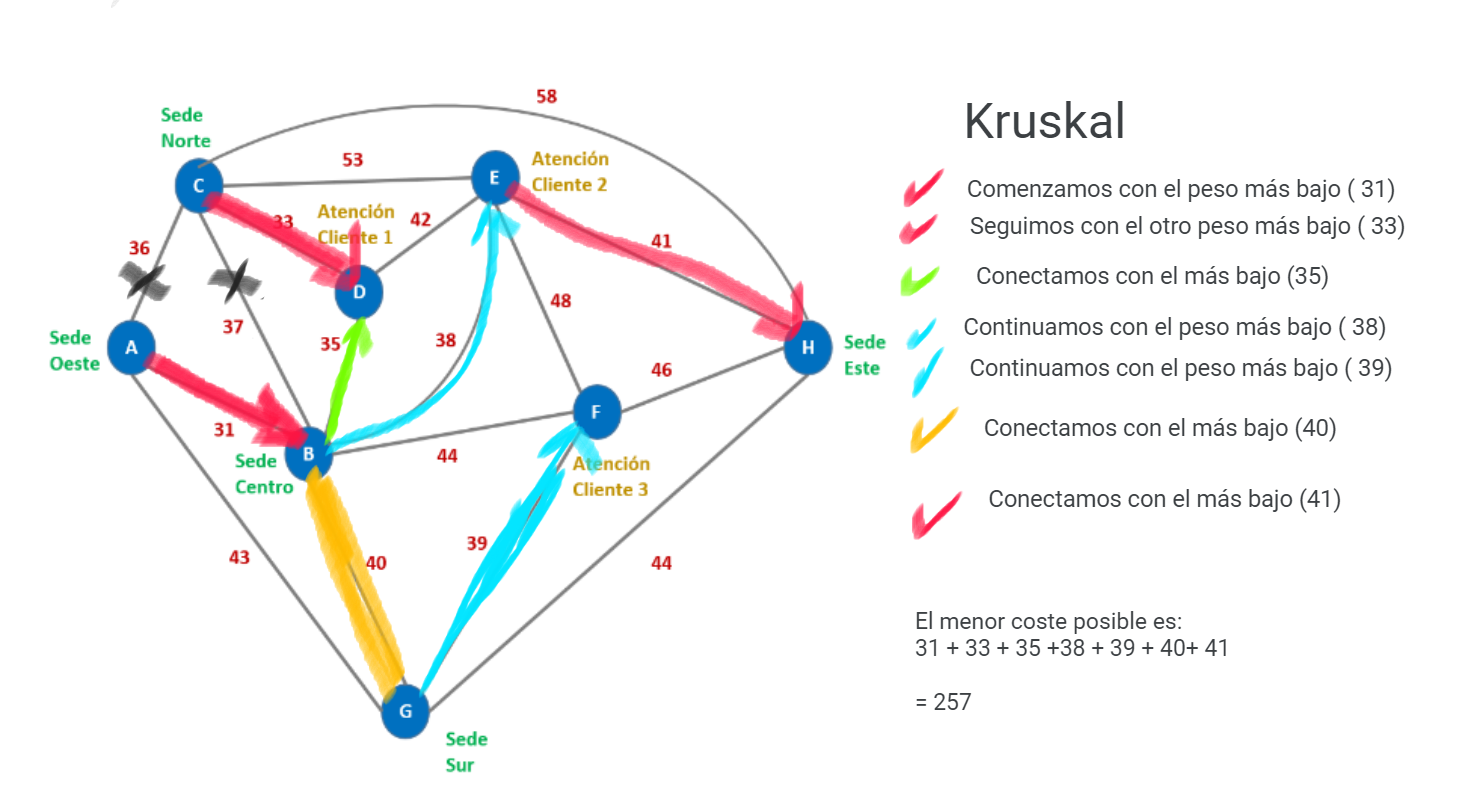

In [50]:
#Importamos librerias
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
#Definimos la matriz de adyacencia
graph = {
    'A': {'C': 36, 'B': 31,  'G': 43},
    'B': {'A': 31, 'C': 37, 'D': 35, 'E': 38, 'F':44,'G':40},
    'C': {'A': 36, 'B': 37, 'D': 33, 'E': 53, 'H':58 },
    'D': {'B': 35, 'C': 33, 'E': 42 },
    'E': {'C': 53, 'D': 42, 'B': 38, 'F': 48, 'H': 41},
    'F': {'B': 44, 'E': 48, 'G': 39, 'H': 46},
    'G': {'A': 43, 'B': 40, 'F': 39, 'H': 44},
    'H': {'C': 58, 'E': 41, 'F': 46, 'G': 44}
}

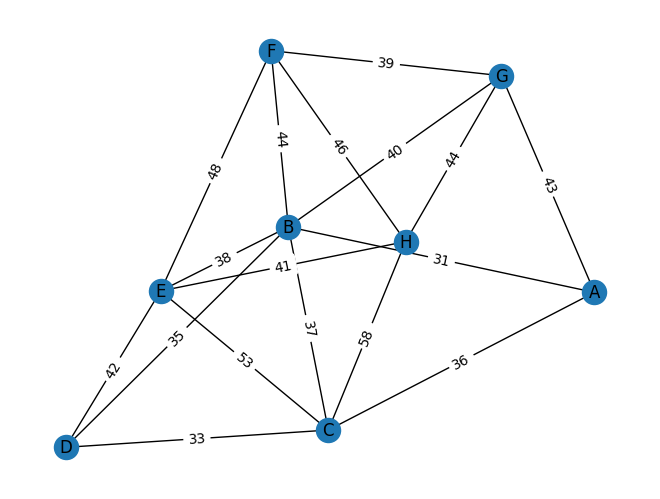

In [52]:
#Grafo

#Creamos el grafo
G = nx.Graph()

#Agregamos los nodos
G.add_nodes_from(graph.keys())

#Agregamos las aristas
for node, edges in graph.items():
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

#Dibujamos el grafo con sus respectivos pesos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [53]:
# Clase para representar un conjunto de elementos disjuntos
class UnionFind:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, v1, v2):
        root1 = self.find(v1)
        root2 = self.find(v2)

        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

# Función para encontrar el árbol de expansión mínima utilizando Kruskal
def kruskal(graph):
    edges = []
    for node, edges_dict in graph.items():
        for edge, weight in edges_dict.items():
            edges.append((weight, node, edge))

    edges.sort()

    vertices = set(graph.keys())
    mst = []
    uf = UnionFind(vertices)

    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst.append((u, v, weight))

    return mst

# Obtener el árbol de expansión mínima utilizando Kruskal
mst = kruskal(graph)
print("Kruskal")
print(mst)

# Calcular el costo total del camino mínimo
coste_total = sum(weight for _, _, weight in mst)
print("Coste total del camino")
print(coste_total)


Kruskal
[('A', 'B', 31), ('C', 'D', 33), ('B', 'D', 35), ('B', 'E', 38), ('F', 'G', 39), ('B', 'G', 40), ('E', 'H', 41)]
Coste total del camino
257


In [54]:
#Verificamos usando las funciones de networkx

#Kruskal
T = nx.minimum_spanning_tree(G, algorithm='kruskal')
print("Kruskal")
print(sorted(T.edges(data=True)))

#Imprimir el coste total del camino
print("Coste total del camino")
print(T.size(weight='weight'))


Kruskal
[('A', 'B', {'weight': 31}), ('B', 'D', {'weight': 35}), ('B', 'E', {'weight': 38}), ('B', 'G', {'weight': 40}), ('C', 'D', {'weight': 33}), ('E', 'H', {'weight': 41}), ('F', 'G', {'weight': 39})]
Coste total del camino
257.0
